## **1. 데이터 & 라이브러리 불러오기**

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/데이터 크리에이터 캠프/Data/Data_6(최종_데이터).zip'

In [ ]:
# 잘 압축이 풀어졌는지 확인
import os

test_bottoms_cnt = len(os.listdir("/content/Data_6(최종_데이터)/test/bottoms"))
test_capandhat_cnt = len(os.listdir("/content/Data_6(최종_데이터)/test/cap_and_hat"))
test_outerwear_cnt = len(os.listdir("/content/Data_6(최종_데이터)/test/outerwear"))
test_shoes_cnt = len(os.listdir("/content/Data_6(최종_데이터)/test/shoes"))
test_tops_cnt = len(os.listdir("/content/Data_6(최종_데이터)/test/tops"))
print('테스트 데이터 수 :', test_bottoms_cnt + test_capandhat_cnt + test_outerwear_cnt + test_shoes_cnt + test_tops_cnt)

train_bottoms_cnt = len(os.listdir("/content/Data_6(최종_데이터)/train/bottoms"))
train_capandhat_cnt = len(os.listdir("/content/Data_6(최종_데이터)/train/cap_and_hat"))
train_outerwear_cnt = len(os.listdir("/content/Data_6(최종_데이터)/train/outerwear"))
train_shoes_cnt = len(os.listdir("/content/Data_6(최종_데이터)/train/shoes"))
train_tops_cnt = len(os.listdir("/content/Data_6(최종_데이터)/train/tops"))
print('트레인 데이터 수 :', train_bottoms_cnt + train_capandhat_cnt + train_outerwear_cnt + train_shoes_cnt + train_tops_cnt)

테스트 데이터 수 : 5961
트레인 데이터 수 : 25633


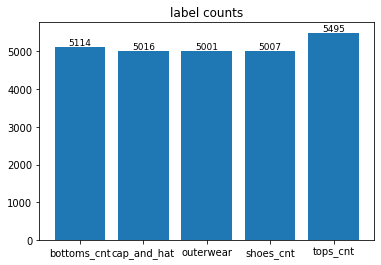

In [ ]:
x = np.arange(5)
labels = ['bottoms_cnt', 'cap_and_hat', 'outerwear', 'shoes_cnt', 'tops_cnt']
values = [train_bottoms_cnt, train_capandhat_cnt, train_outerwear_cnt, train_shoes_cnt, train_tops_cnt]

plt.bar(x, values)
plt.xticks(x, labels)

for i, v in enumerate(x):
    plt.text(v, values[i], str(values[i]),
             fontsize=9,             
             horizontalalignment='center',
             verticalalignment='bottom')

plt.title('label counts')
plt.show()

## **2. 데이터 전처리하기**

### **2.1 데이터 생성, 해상도 변경**

In [ ]:
train_img = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/Data_6(최종_데이터)/train',
    label_mode	= 'categorical',
    seed = 18,
    image_size = (128, 128), # 사진 크기를 227대128로
    batch_size = 32, # 32개씩 데이터 처리
    subset = 'training', # training 데이터
    validation_split=0.15, # training 데이터는 80%    
)

val_img = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/Data_6(최종_데이터)/train',
    label_mode	= 'categorical',
    seed = 18,
    image_size = (128, 128),
    batch_size = 32,
    subset = 'validation', # val 데이터
    validation_split=0.15, # val 데이터는 20%    
)

test_img = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/Data_6(최종_데이터)/test',
    label_mode	= 'categorical',
    seed = 18,
    image_size = (128, 128),
    batch_size = 32,
    subset = None, 
    validation_split= None
)

# https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory

Found 25633 files belonging to 5 classes.
Using 21789 files for training.
Found 25633 files belonging to 5 classes.
Using 3844 files for validation.
Found 5961 files belonging to 5 classes.


In [ ]:
train_gray_img = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/Data_6(최종_데이터)/train',
    label_mode	= 'categorical',
    seed = 18,    
    image_size = (128, 128), # 사진 크기를 227대128로
    batch_size = 32, # 32개씩 데이터 처리
    color_mode = 'grayscale',
    subset = 'training', # training 데이터
    validation_split=0.15, # training 데이터는 80%    
)

val_gray_img = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/Data_6(최종_데이터)/train',
    label_mode	= 'categorical',
    seed = 18,
    image_size = (128, 128),
    batch_size = 32,
    color_mode = 'grayscale',
    subset = 'validation', # val 데이터
    validation_split=0.15, # val 데이터는 20%    
)

test_gray_img = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/Data_6(최종_데이터)/test',
    label_mode	= 'categorical',
    seed = 18,
    image_size = (128, 128),
    batch_size = 32,
    color_mode = 'grayscale',
    subset = None, 
    validation_split= None
)

Found 25633 files belonging to 5 classes.
Using 21789 files for training.
Found 25633 files belonging to 5 classes.
Using 3844 files for validation.
Found 5961 files belonging to 5 classes.


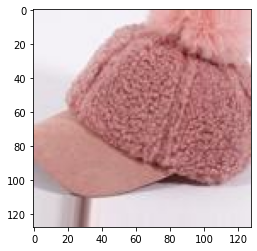

In [ ]:
# 데이터는 다음과 같이 출력할 수 있다.
import matplotlib.pyplot as plt

for i, j in train_img.take(1):
  plt.imshow(i[0].numpy().astype('uint8'))  

### **2.2 데이터 압축**

In [ ]:
def pre(i, j):
  i = tf.cast(i/255.0, tf.float32)
  return i, j

train_img = train_img.map(pre)
val_img = val_img.map(pre)

train_gray_img = train_gray_img.map(pre)
val_gray_img = val_gray_img.map(pre)

test_img = test_img.map(pre)
test_gray_img = test_gray_img.map(pre)

In [ ]:
for i, j in train_img.take(1):
  print(i)
  print(j)

tf.Tensor(
[[[[0.98039216 0.98039216 0.9882353 ]
   [0.98039216 0.98039216 0.9882353 ]
   [0.98039216 0.98039216 0.9882353 ]
   ...
   [0.9882353  0.9882353  0.99607843]
   [0.9882353  0.9882353  0.99607843]
   [0.9882353  0.9882353  0.99607843]]

  [[0.98039216 0.98039216 0.9882353 ]
   [0.98039216 0.98039216 0.9882353 ]
   [0.98039216 0.98039216 0.9882353 ]
   ...
   [0.9882353  0.9882353  0.99607843]
   [0.9882353  0.9882353  0.99607843]
   [0.9882353  0.9882353  0.99607843]]

  [[0.98039216 0.98039216 0.9882353 ]
   [0.98039216 0.98039216 0.9882353 ]
   [0.98039216 0.98039216 0.9882353 ]
   ...
   [0.9882353  0.9882353  0.99607843]
   [0.9882353  0.9882353  0.99607843]
   [0.9882353  0.9882353  0.99607843]]

  ...

  [[0.98039216 0.98039216 0.9882353 ]
   [0.98039216 0.98039216 0.9882353 ]
   [0.98039216 0.98039216 0.9882353 ]
   ...
   [0.99215686 0.99215686 1.        ]
   [0.99215686 0.99215686 1.        ]
   [0.99215686 0.99215686 1.        ]]

  [[0.98039216 0.98039216 0.988235

## **3. 네번째 모델 생성**
> 모델 레이어 중 이미지 증강 없는 버전

### **3.1 모델 선언**

In [ ]:
from keras import backend as K

def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

#https://aakashgoel12.medium.com/how-to-add-user-defined-function-get-f1-score-in-keras-metrics-3013f979ce0d

In [ ]:
model1 = tf.keras.Sequential([

    tf.keras.layers.Conv2D(32, (3, 3), padding = 'same', activation = 'relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu'), 
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),    
    tf.keras.layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu'), 
    tf.keras.layers.MaxPooling2D((2, 2)), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),    
    tf.keras.layers.Dense(5, activation='softmax')                             
])

In [ ]:
model1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', get_f1])
# 레이블값이 원핫인코딩 되어 있는 경우 loss 함수를 categorical_crossentropy로
# 안되어 있는 경우 sparse_categorical_crossentropy로

In [ ]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 32, 32, 64)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 128)      

### **3.2 모델 학습**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor = 'val_loss', patience = 3, mode = 'min')
# acc면 mode를 max로 
# loss면 mode를 min으로

In [ ]:
history_1 = model1.fit(train_img, validation_data = val_img, epochs=20, callbacks = [early_stop])

Epoch 1/20
681/681 [==============================] - 22s 31ms/step - loss: 0.7885 - accuracy: 0.6846 - get_f1: 0.6404 - val_loss: 0.4790 - val_accuracy: 0.8239 - val_get_f1: 0.8072
Epoch 2/20
681/681 [==============================] - 22s 32ms/step - loss: 0.4360 - accuracy: 0.8324 - get_f1: 0.8269 - val_loss: 0.3874 - val_accuracy: 0.8528 - val_get_f1: 0.8476
Epoch 3/20
681/681 [==============================] - 19s 28ms/step - loss: 0.3288 - accuracy: 0.8715 - get_f1: 0.8700 - val_loss: 0.3578 - val_accuracy: 0.8720 - val_get_f1: 0.8684
Epoch 4/20
681/681 [==============================] - 19s 27ms/step - loss: 0.2645 - accuracy: 0.8977 - get_f1: 0.8964 - val_loss: 0.3558 - val_accuracy: 0.8704 - val_get_f1: 0.8721
Epoch 5/20
681/681 [==============================] - 21s 31ms/step - loss: 0.2180 - accuracy: 0.9143 - get_f1: 0.9144 - val_loss: 0.3541 - val_accuracy: 0.8806 - val_get_f1: 0.8802
Epoch 6/20
681/681 [==============================] - 21s 30ms/step - loss: 0.1800 - accur

### **3.3 모델 성능 평가**

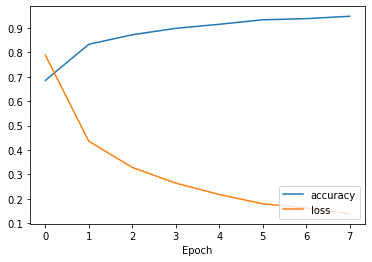

In [ ]:
plt.plot(history_1.history['accuracy'], label='accuracy')
plt.plot(history_1.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

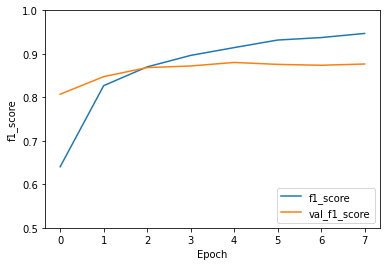

In [ ]:
plt.plot(history_1.history['get_f1'], label='f1_score')
plt.plot(history_1.history['val_get_f1'], label = 'val_f1_score') 
plt.xlabel('Epoch')
plt.ylabel('f1_score')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

**test data 정확도 확인**

In [ ]:
test_loss, test_acc, f1_score = model1.evaluate(test_img)
print('테스트 데이터 acc : ', test_acc)
print('테스트 데이터 f1_score : ', f1_score)
print('테스트 데이터 loss : ', test_loss)

187/187 [==============================] - 4s 21ms/step - loss: 0.5362 - accuracy: 0.8348 - get_f1: 0.8321
테스트 데이터 acc :  0.8347592949867249
테스트 데이터 f1_score :  0.8321070671081543
테스트 데이터 loss :  0.5362197756767273


In [ ]:
# model1.save('/content/drive/MyDrive/데이터 크리에이터 캠프/model/네번째_모델(test_f1_score : 0.8327466249465942)')
model1.save(f'/content/drive/MyDrive/데이터 크리에이터 캠프/model/네번째_모델(test_f1_score : {f1_score})')

## **4. 다섯번째 모델 생성**
> 모델 레이어 중 이미지 증강 있는 버전
> 모델 레이어에 이미지 증강을 넣으면 오버피팅을 막을 수 있다고 한다.

### **4.1 모델 선언**

In [ ]:
model2 = tf.keras.Sequential([
    
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal', input_shape=(128, 128, 3)), # 랜덤으로 이미지가 뒤집어진다.
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1), # 랜덤으로 돌려진다.
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1), # 랜덤으로 줌이 된다.    
    # https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing

    tf.keras.layers.Conv2D(32, (3, 3), padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu'), 
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),     
    tf.keras.layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu'), 
    tf.keras.layers.MaxPooling2D((2, 2)),   
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),    
    tf.keras.layers.Dense(5, activation='softmax')                             
])

In [ ]:
model2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', get_f1])

In [ ]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_1 (RandomFlip)  (None, 128, 128, 3)       0         
                                                                 
 random_rotation_1 (RandomRo  (None, 128, 128, 3)      0         
 tation)                                                         
                                                                 
 random_zoom_1 (RandomZoom)  (None, 128, 128, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 64, 64, 64)       

### **4.2 모델 학습**

In [ ]:
history_2 = model2.fit(train_img, validation_data = val_img, epochs=20, callbacks = [early_stop])

Epoch 1/20
681/681 [==============================] - 44s 63ms/step - loss: 1.0336 - accuracy: 0.5718 - get_f1: 0.4822 - val_loss: 0.7020 - val_accuracy: 0.7024 - val_get_f1: 0.6804
Epoch 2/20
681/681 [==============================] - 46s 67ms/step - loss: 0.6813 - accuracy: 0.7231 - get_f1: 0.7020 - val_loss: 0.5702 - val_accuracy: 0.7807 - val_get_f1: 0.7598
Epoch 3/20
681/681 [==============================] - 44s 64ms/step - loss: 0.5911 - accuracy: 0.7633 - get_f1: 0.7494 - val_loss: 0.5205 - val_accuracy: 0.7955 - val_get_f1: 0.7813
Epoch 4/20
681/681 [==============================] - 43s 63ms/step - loss: 0.5199 - accuracy: 0.7930 - get_f1: 0.7840 - val_loss: 0.5209 - val_accuracy: 0.7937 - val_get_f1: 0.7828
Epoch 5/20
681/681 [==============================] - 42s 61ms/step - loss: 0.4908 - accuracy: 0.8078 - get_f1: 0.8004 - val_loss: 0.4752 - val_accuracy: 0.8179 - val_get_f1: 0.8120
Epoch 6/20
681/681 [==============================] - 47s 68ms/step - loss: 0.4519 - accur

### **4.3 모델 성능 평가**

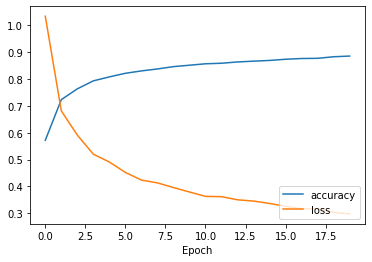

In [ ]:
plt.plot(history_2.history['accuracy'], label='accuracy')
plt.plot(history_2.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

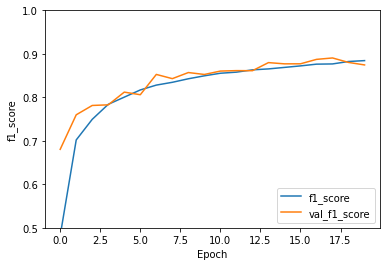

In [ ]:
plt.plot(history_2.history['get_f1'], label='f1_score')
plt.plot(history_2.history['val_get_f1'], label = 'val_f1_score') 
plt.xlabel('Epoch')
plt.ylabel('f1_score')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

**test data 정확도 확인**

In [ ]:
test_loss, test_acc, f1_score = model2.evaluate(test_img)
print('테스트 데이터 acc : ', test_acc)
print('테스트 데이터 f1_score : ', f1_score)
print('테스트 데이터 loss : ', test_loss)

187/187 [==============================] - 6s 33ms/step - loss: 0.4270 - accuracy: 0.8475 - get_f1: 0.8468
테스트 데이터 acc :  0.8475087881088257
테스트 데이터 f1_score :  0.8467732667922974
테스트 데이터 loss :  0.42696672677993774


In [ ]:
model2.save(f'/content/drive/MyDrive/데이터 크리에이터 캠프/model/다섯번째_모델(test_f1_score : {f1_score})')

## **5. 여섯번째 모델 생성**
> 데이터를 흑백 이미지로 변형하여 학습시켜보자

> 이미지 증강 없이 학습시켜보자

### **5.1 모델 선언**

In [ ]:
model3 = tf.keras.Sequential([      
    tf.keras.layers.Conv2D(32, (3, 3), padding = 'same', activation = 'relu', input_shape=(128, 128, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu'), 
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),    
    tf.keras.layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu'), 
    tf.keras.layers.MaxPooling2D((2, 2)),   
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),    
    tf.keras.layers.Dense(5, activation='softmax')                             
])

In [ ]:
model3.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', get_f1])

In [ ]:
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 128, 128, 32)      320       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 32, 32, 64)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 128)      

### **5.2 모델 학습**

In [ ]:
history_3 = model3.fit(train_gray_img, validation_data = val_gray_img, epochs=20, callbacks = [early_stop])

Epoch 1/20
681/681 [==============================] - 17s 23ms/step - loss: 0.7418 - accuracy: 0.7110 - get_f1: 0.6691 - val_loss: 0.4909 - val_accuracy: 0.8239 - val_get_f1: 0.8187
Epoch 2/20
681/681 [==============================] - 17s 24ms/step - loss: 0.4235 - accuracy: 0.8415 - get_f1: 0.8364 - val_loss: 0.4056 - val_accuracy: 0.8522 - val_get_f1: 0.8504
Epoch 3/20
681/681 [==============================] - 18s 26ms/step - loss: 0.3225 - accuracy: 0.8761 - get_f1: 0.8760 - val_loss: 0.3494 - val_accuracy: 0.8717 - val_get_f1: 0.8678
Epoch 4/20
681/681 [==============================] - 16s 23ms/step - loss: 0.2533 - accuracy: 0.9049 - get_f1: 0.9049 - val_loss: 0.3380 - val_accuracy: 0.8809 - val_get_f1: 0.8800
Epoch 5/20
681/681 [==============================] - 17s 24ms/step - loss: 0.2048 - accuracy: 0.9232 - get_f1: 0.9232 - val_loss: 0.3592 - val_accuracy: 0.8884 - val_get_f1: 0.8889
Epoch 6/20
681/681 [==============================] - 17s 25ms/step - loss: 0.1679 - accur

### **5.3 모델 성능 평가**

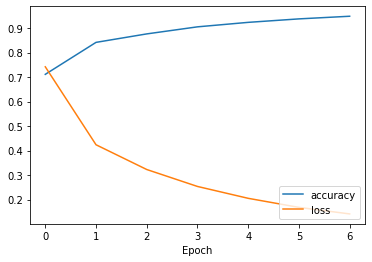

In [ ]:
plt.plot(history_3.history['accuracy'], label='accuracy')
plt.plot(history_3.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

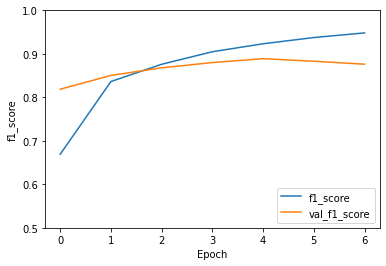

In [ ]:
plt.plot(history_3.history['get_f1'], label='f1_score')
plt.plot(history_3.history['val_get_f1'], label = 'val_f1_score') 
plt.xlabel('Epoch')
plt.ylabel('f1_score')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

**test data 정확도 확인**

In [ ]:
test_loss, test_acc, f1_score = model3.evaluate(test_gray_img)
print('테스트 데이터 acc : ', test_acc)
print('테스트 데이터 f1_score : ', f1_score)
print('테스트 데이터 loss : ', test_loss)

187/187 [==============================] - 3s 15ms/step - loss: 0.4844 - accuracy: 0.8634 - get_f1: 0.8649
테스트 데이터 acc :  0.8634457588195801
테스트 데이터 f1_score :  0.8648688197135925
테스트 데이터 loss :  0.4843840003013611


In [ ]:
model3.save(f'/content/drive/MyDrive/데이터 크리에이터 캠프/model/여섯번째_모델(test_f1_score : {f1_score})')